In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

<AxesSubplot:>

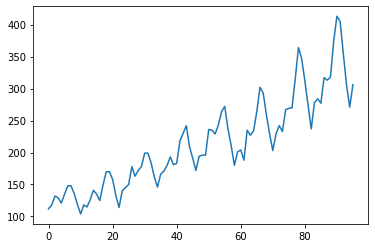

In [18]:
df = pd.read_csv("Airlines Data.csv")
df.Passengers.plot() 

In [3]:
print("Dataset Length:: ",len(df))
print("Dataset Shape:: ",df.shape)

Dataset Length::  96
Dataset Shape::  (96, 2)


In [50]:
df["Date"] = pd.to_datetime(df.Month,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") 
df["year"] = df.Date.dt.strftime("%Y")

<AxesSubplot:xlabel='month', ylabel='year'>

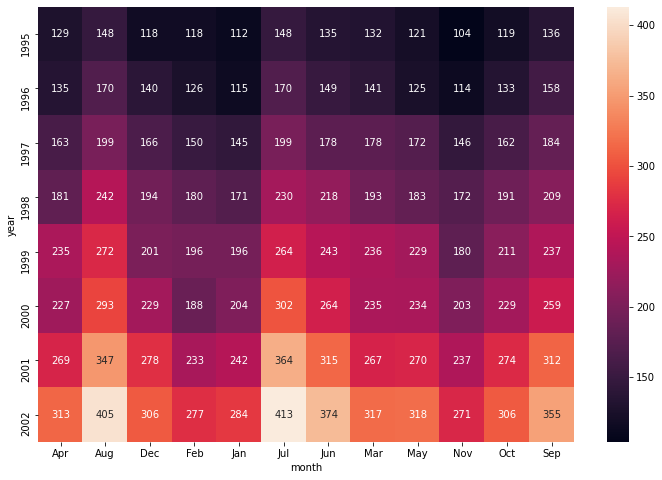

In [51]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

# Splitting data

In [4]:
Train = df.head(76)
Test = df.tail(20) 

# Moving Average 

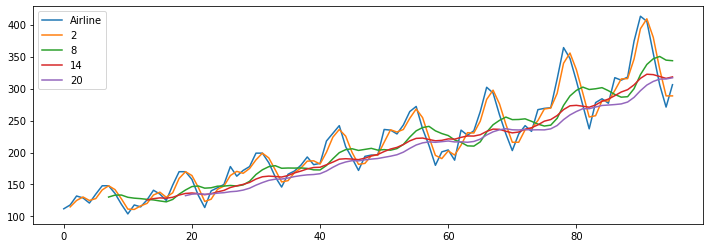

In [19]:
plt.figure(figsize=(12,4))
df.Passengers.plot(label="Airline")
for i in range(2,24,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

# Time series decomposition plot 


<ipython-input-20-d37bee6357ab>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(df.Passengers,freq=12)


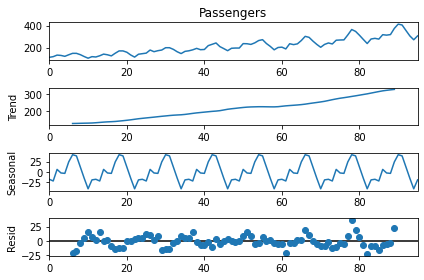

In [20]:
decompose_ts_add = seasonal_decompose(df.Passengers,freq=12)
decompose_ts_add.plot()
plt.show() 

# ACF plots and PACF plots


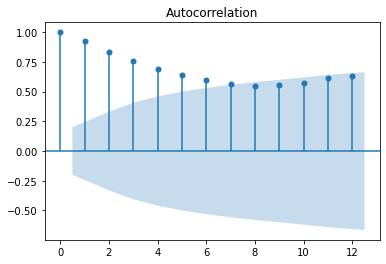

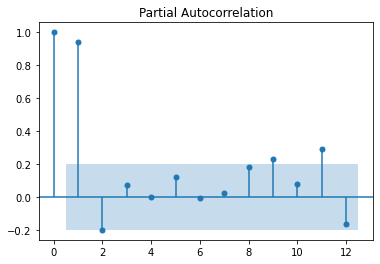

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show() 
 

### Evaluation Metric MAPE

In [22]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

### Simple Exponential Method


In [27]:
Train["Passengers"] = Train["Passengers"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.8)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)   

<ipython-input-27-0d76a5dca918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Passengers"] = Train["Passengers"].astype('double')
C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


15.197137428714248

### Holt method 

In [29]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.10, smoothing_slope=0.5)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)   

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-29-f2f757b8ce6a>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.10, smoothing_slope=0.5)


12.883300884928559

### Holts winter exponential smoothing with additive seasonality and additive trend


In [32]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)  

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.723724919128461

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [41]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)  

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


9.375468102339342

In [62]:
!pip install pmdarima
import pmdarima
from pmdarima import auto_arima

In [64]:
from statsmodels.tsa.arima_model import ARIMA

auto_arima_model = auto_arima(Train["Passengers"],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=476.102, Time=1.10 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=467.341, Time=0.28 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=468.576, Time=0.29 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=467.902, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=468.904, Time=0.11 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=469.733, Time=0.45 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=468.449, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=470.299, Time=0.32 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=471.184, Time=0.79 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=473.762, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=465.663, Time=0.09 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=465.499, Time=0.77 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=464.291, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=466.217, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=466.669, Time=0.55 sec
 ARIMA(0,1

In [65]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   76
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -229.085
Date:                            Thu, 25 Nov 2021   AIC                            464.170
Time:                                    17:39:58   BIC                            470.599
Sample:                                         0   HQIC                           466.698
                                             - 76                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2966      0.115     -2.575      0.010      -0.522      -0.071
ar.S.L12      -0.4435      0.118     -3.759      0.000      -0.675      -0.212
sigma2        80.7603     14.265      5.661      0.000      52.801     108.720
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.99   Prob(JB):                         0.56
Heteroskedasticity (H):               2.27   Skew:                             0.33
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
auto_arima_model.predict_in_sample( )

array([  0.        , 111.99816959, 118.00034663, 131.99943969,
       129.00026405, 121.00018367, 134.99948628, 147.99973311,
       148.00006002, 136.00043887, 119.00020811, 104.00116157,
       173.99990669, 121.00388854, 138.51665837, 137.70343173,
       127.89016451, 139.59250565, 159.03441628, 167.62614142,
       158.0050576 , 140.98474753, 120.42606473, 129.00467084,
       134.10300104, 152.00390406, 165.67824377, 169.34377057,
       156.95047863, 186.19371164, 199.47488829, 197.94787266,
       187.        , 163.43753013, 144.93641149, 166.31459545,
       167.65324068, 177.60877979, 201.83759145, 184.72992348,
       181.86778338, 196.55977817, 232.76729842, 232.66896183,
       224.7718378 , 191.40201784, 172.08879342, 195.15601333,
       199.19599288, 204.11571585, 217.795166  , 216.63539972,
       236.44777945, 254.43197077, 261.40497668, 269.19286716,
       246.59073565, 220.18645106, 195.17680041, 205.06619448,
       204.36397305, 208.08935715, 221.95438217, 223.49

In [68]:
# For getting predictions for future we use predict() function 
pred_test = pd.Series(auto_arima_model.predict(n_periods=20))
# Adding the index values of Test Data set to predictions of Auto Arima
pred_test.index = Test.index
MAPE(pred_test,Test.Passengers)

8.844843984801418

## Final Model by combining train and test

In [42]:
df["Passengers"] = df["Passengers"].astype('double')
hwe_model_add_add = ExponentialSmoothing(df["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()   

C:\Users\anbuc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [44]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)    

96     319.235284
97     311.528413
98     350.278738
99     346.985064
100    351.845130
101    403.925766
102    440.566807
103    427.446405
104    376.628081
105    329.767444
dtype: float64

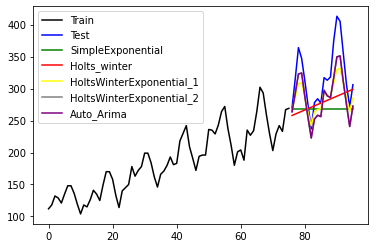

In [75]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="yellow")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="grey")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="Auto_Arima",color="purple")
plt.legend(loc='best')